In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pylab as pylab
from matplotlib import rc

In [3]:
import matplotlib.font_manager

In [4]:
al_algo = ["RALIS", "Entropy", "BALD", "Uniform", "Supervised"]
budget = [64, 128, 592, 960, 1184, 1424, 1904, 2384, 3568]
#values = ['0.5\%','128 (1\%)', '593 (5\%)', '960 (8\%)', '1184 (10\%)', '1424 (12\%)', '1904 (16\%)', '2384 (20\%)', '3568 (30\%)']
values = ['0.5\%','1\%', '5\%', '8\%', '10\%', '12\%', '16\%', '20\%', '30\%']
supervised_allTrain50patients = 0.914
#ralis
ralis_lr_05_mean = np.array([0.521, 0.662, 0.796, 0.840, 0.851, 0.881, 0.894, 0.903, 0.911])
ralis_lr_05_std = np.array([0.109, 0.052, 0.015, 0.023, 0.020, 0.006, 0.014, 0.006, 0.006])
# random
random_mean = np.array([0.281, 0.319, 0.354, 0.417, 0.437, 0.422, 0.521, 0.553, 0.644])
random_std = np.array([0.025, 0.035, 0.084, 0.085, 0.030, 0.046, 0.075, 0.065, 0.069])
#bald
bald_mean = np.array([0.302, 0.272, 0.483, 0.603, 0.624, 0.754, 0.819, 0.756, 0.828])
bald_std = np.array([0.082, 0.036, 0.078, 0.150, 0.150, 0.102, 0.088, 0.121, 0.098])
#entropy
entropy_mean = np.array([0.413, 0.557, 0.817, 0.843, 0.873, 0.871, 0.887, 0.909, 0.909])
entropy_std = np.array([0.137, 0.188, 0.020, 0.024, 0.007, 0.016, 0.017, 0.005, 0.005])

In [40]:
def rc_params():
    plt.rc('text', usetex=True)
    plt.rc('font', **{'family': 'serif', 'sans-serif': ['lmodern'], 'size': 20})
    plt.rc('axes', **{'titlesize': 18, 'labelsize': 18})
    plt.rc('xtick', **{'labelsize': 18})
    plt.rc('ytick', **{'labelsize': 18})
    plt.rc('legend', **{'fontsize': 18})
    plt.rc('figure', **{'figsize': (12,7)})

In [83]:
import matplotlib as mpl
#mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#ca0020","#0571b0",  "#FCBE11", "#808080", "#000000"]) 
#FFC30B
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#E10600", "#808080", "#F3D500", "#0080fe", "#000000"]) 

In [84]:
# ralis 
ralis_lower_bound = np.subtract(ralis_lr_05_mean, ralis_lr_05_std)
ralis_upper_bound = np.add(ralis_lr_05_mean, ralis_lr_05_std)
# random
random_lower_bound = np.subtract(random_mean, random_std)
random_upper_bound = np.add(random_mean, random_std)
#bald
bald_lower_bound = np.subtract(bald_mean, bald_std)
bald_upper_bound = np.add(bald_mean, bald_std)
#entropy
entropy_lower_bound = np.subtract(entropy_mean, entropy_std)
entropy_upper_bound = np.add(entropy_mean, entropy_std)

[0.521 0.662 0.796 0.84  0.851 0.881 0.894 0.903 0.911]
[0.413 0.557 0.817 0.843 0.873 0.871 0.887 0.909 0.909]
[0.302 0.272 0.483 0.603 0.624 0.754 0.819 0.756 0.828]
[0.281 0.319 0.354 0.417 0.437 0.422 0.521 0.553 0.644]


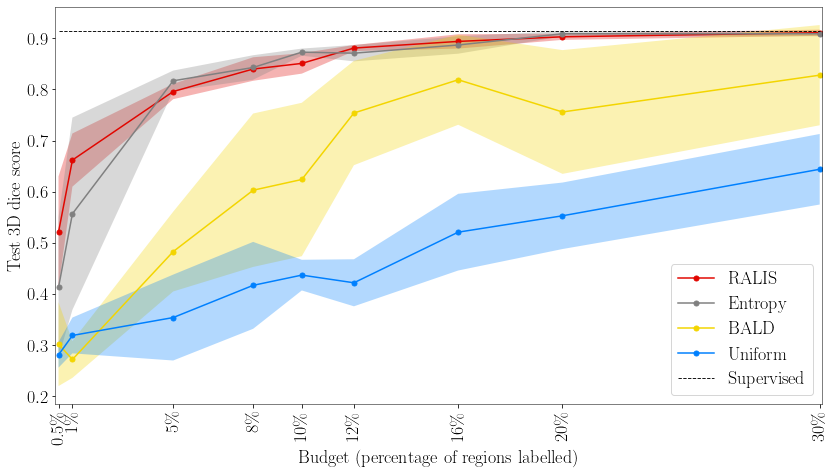

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.setp(ax.spines.values(), linewidth=0.5, color='black')
rc_params()
algos = [ralis_lr_05_mean, entropy_mean, bald_mean, random_mean]
lower_bounds = [ralis_lower_bound, entropy_lower_bound, bald_lower_bound, random_lower_bound]
upper_bounds = [ralis_upper_bound, entropy_upper_bound, bald_upper_bound, random_upper_bound]
for i, algo in enumerate(algos):
    print(algo)
    plt.plot(budget, algo, label=al_algo[i], marker='o', markersize=5)
    plt.fill_between(budget, lower_bounds[i], upper_bounds[i], alpha=0.3)
plt.plot(budget, 9*[supervised_allTrain50patients], label = al_algo[4], linestyle='--', linewidth=0.9, color='black')
plt.xticks(budget, values)

plt.xticks(rotation=90)
plt.xlabel('Budget (percentage of regions labelled)')
#plt.xscale('log')
plt.autoscale(enable=True, axis='x')
plt.xlim(50, 3580)
plt.ylabel('Test 3D dice score')
plt.legend()
plt.tight_layout()
plt.savefig("AL-algorithms.pdf")

In [86]:
################# using RC parameters
# plt.rc('text', usetex=True)
# plt.rc('font', **{'family': 'serif', 'sans-serif': ['lmodern'], 'size': 18})
# plt.rc('axes', **{'titlesize': 18, 'labelsize': 18})

#plt.tight_layout()
# define OUT_PATH, name
#OUT_PATH = '~/ralis/visualisations/'
name = 'AL-algorithms'
plt.savefig(f'{name}.pdf', bbox_inches='tight')
plt.close()